In [1]:
from deeprankcore.tools.hist import hdf5_to_pandas, save_hist
from deeprankcore.dataset import GraphDataset
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
hdf5_path = "/Users/giuliacrocioni/Desktop/docs/eScience/projects/3D-vac/snellius_data/snellius_100_07122022/data/pMHCI/features_output_folder/GNN/residue/11122022/residue.hdf5"
#hdf5_path = '/Users/giuliacrocioni/Desktop/docs/eScience/projects/3D-vac/deeprank-core/tests/data/hdf5/train.hdf5'
dataset = GraphDataset(hdf5_path, target = 'binary', standardize=False)
dataset.hdf5_to_pandas()

/Users/giuliacrocioni/miniforge3/envs/deeprankcore/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   ['/Users/giuliacrocioni/Desktop/docs/eScience/projects/3D-vac/snellius_data/snellius_100_07122022/data/pMHCI/features_output_folder/GNN/residue/11122022/residue.hdf5'] dataset                 : 100%|██████████| 1/1 [00:00<00:00, 280.33it/s, entry_name=residue.hdf5]


,id,bsa,charge,hb_acceptors,hb_donors,hse_0,hse_1,hse_2,info_content,polarity_0,...,res_type_17,res_type_18,res_type_19,sasa,covalent,distance,electrostatic,same_chain,vanderwaals,binary
0,residue-ppi-BA-102084:M-P,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.04753919310071697,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0...","[0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, ...","[0, 1, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 0, 2, 0, ...","[12.0, 18.0, 27.0, 13.0, 22.0, 24.0, 17.0, 19....","[16.0, 13.0, 13.0, 13.0, 9.0, 18.0, 22.0, 17.0...","[0.38133872008297265, 0.9258992859839675, 0.41...","[2.06, 0.52, 0.43, 2.57, 0.52, 0.38, 1.03, 0.8...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[41.938940962025626, 32.823784191570624, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.975739246763554, 11.416669610705217, 3.389...","[0.6008923978555485, -0.49922786586469226, -1....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.003337774386633316, -0.010806477383388307,...",0
1,residue-ppi-BA-103822:M-P,"[0.0, 4.710390549635437, 111.18931277117048, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 4, 0, 0, 0, ...","[0, 0, 0, 2, 1, 0, 1, 0, 3, 5, 1, 0, 0, 5, 0, ...","[19.0, 22.0, 17.0, 1.0, 21.0, 24.0, 19.0, 22.0...","[16.0, 17.0, 16.0, 26.0, 18.0, 19.0, 14.0, 17....","[0.40815892142618265, 0.9151742591038027, 0.45...","[0.88, 0.18, 0.0, 0.76, 0.34, 0.38, 0.49, 0.76...","[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.536472115426303, 0.0, 3.605322771166495, 75...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.470715920382998, 9.342134766743628, 6.09070...","[3.952477678324483, 2.714316956744216, 15.5785...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.7374692635548443, -0.025198981187732526, -...",0
2,residue-ppi-BA-104083:M-P,"[0.0, 185.05081297719443, 0.0, 19.452693224521...","[0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, ...","[0, 1, 0, 0, 0, 0, 0, 5, 0, 3, 1, 1, 5, 1, 1, ...","[19.0, 13.0, 17.0, 17.0, 22.0, 1.0, 19.0, 9.0,...","[16.0, 14.0, 20.0, 14.0, 17.0, 23.0, 10.0, 21....","[0.3804979928104541, 0.5129851494513361, 0.474...","[0.88, 0.0, 0.88, 0.49, 0.76, 0.19, 2.13, 0.86...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.9661488208374966, 26.66109295571287, 3.0003...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[6.641604926521902, 3.8989199786607576, 8.8734...","[6.092157085973096, 5.5604110512457705, 9.8510...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.1656632520136317, -2.540883618448996, -0.0...",1
3,residue-ppi-BA-104366:M-P,"[0.0, 0.0, 0.0, 18.762024422973496, 166.040768...","[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, -1.0, 0.0, 0.0,...","[1, 0, 0, 0, 0, 1, 4, 0, 0, 0, 2, 2, 0, 2, 0, ...","[1, 1, 5, 3, 1, 1, 0, 1, 0, 0, 2, 1, 5, 1, 0, ...","[6.0, 27.0, 4.0, 3.0, 17.0, 0.0, 2.0, 20.0, 19...","[15.0, 7.0, 20.0, 17.0, 9.0, 21.0, 21.0, 18.0,...","[0.9237041398691105, 0.48738236183498373, 0.87...","[0.74, 2.57, 0.82, 0.59, 0.0, 0.82, 0.82, 0.18...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[124.28099923461663, 1.091138877516641, 156.04...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.990788345451707, 6.882687701763026, 5.05761...","[8.485093123894064, 12.09209103472666, 5.14241...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.

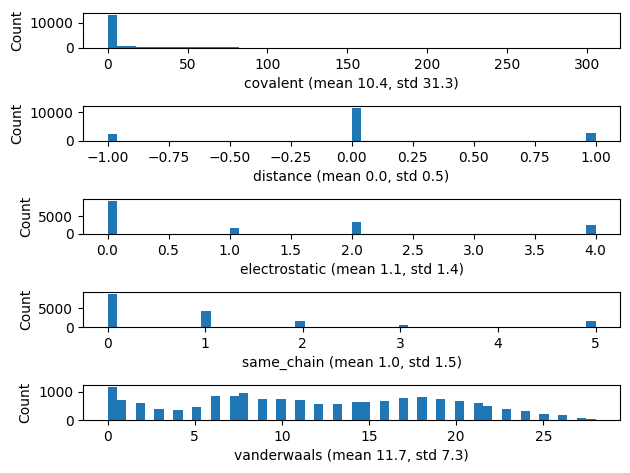

In [7]:
from deeprankcore.domain import (edgestorage as Efeat, nodestorage as Nfeat,
                                 targetstorage as targets, gridstorage)

edge_features_dict = {}
with h5py.File(hdf5_path, 'r') as f5:
    grp = f5[list(f5.keys())[0]]

    tensor_idx = 0
    for feat in dataset.edge_features:
        vals = grp[f"{Efeat.EDGE}/{feat}"][()]
        if vals.ndim == 1: # features with only one channel
            arr = []
            for entry_idx in range(len(dataset)):
                arr.append(dataset.get(entry_idx).x[:, tensor_idx])
            arr = np.concatenate(arr)
            edge_features_dict[feat] = arr
            tensor_idx += 1
        else:
            for ch in range(vals.shape[1]):
                arr = []
                for entry_idx in range(len(dataset)):
                    arr.append(dataset.get(entry_idx).x[:, tensor_idx])
                tensor_idx += 1
                arr = np.concatenate(arr)
                edge_features_dict[feat + f'_{ch}'] = arr

fig, axs = plt.subplots(len(edge_features_dict))

for idx, feat in enumerate(edge_features_dict):

    mean = str(round(edge_features_dict[feat].mean(), 1))
    dev = str(round(edge_features_dict[feat].std(), 1))

    axs[idx].hist(edge_features_dict[feat], bins='rice')
    axs[idx].set(xlabel=f'{feat} (mean {mean}, std {dev})', ylabel='Count')

fig.tight_layout()